# Exercises week 38

## September 15-19

## Resampling and the Bias-Variance Trade-off


### Learning goals

After completing these exercises, you will know how to

- Derive expectation and variances values related to linear regression
- Compute expectation and variances values related to linear regression
- Compute and evaluate the trade-off between bias and variance of a model

### Deliverables

Complete the following exercises while working in a jupyter notebook. Then, in canvas, include

- The jupyter notebook with the exercises completed
- An exported PDF of the notebook (https://code.visualstudio.com/docs/datascience/jupyter-notebooks#_export-your-jupyter-notebook)


## Use the books!

This week deals with various mean values and variances in linear regression methods (here it may be useful to look up chapter 3, equation (3.8) of [Trevor Hastie, Robert Tibshirani, Jerome H. Friedman, The Elements of Statistical Learning, Springer](https://www.springer.com/gp/book/9780387848570)).

For more discussions on Ridge regression and calculation of expectation values, [Wessel van Wieringen's](https://arxiv.org/abs/1509.09169) article is highly recommended.

The exercises this week are also a part of project 1 and can be reused in the theory part of the project.

### Definitions

We assume that there exists a continuous function $f(\boldsymbol{x})$ and a normal distributed error $\boldsymbol{\varepsilon}\sim N(0, \sigma^2)$ which describes our data


$$
\boldsymbol{y} = f(\boldsymbol{x})+\boldsymbol{\varepsilon}
$$


We further assume that this continous function can be modeled with a linear model $\mathbf{\tilde{y}}$ of some features $\mathbf{X}$.


$$
\boldsymbol{y} = \boldsymbol{\tilde{y}} + \boldsymbol{\varepsilon} = \boldsymbol{X}\boldsymbol{\beta} +\boldsymbol{\varepsilon}
$$


We therefore get that our data $\boldsymbol{y}$ has an expectation value $\boldsymbol{X}\boldsymbol{\beta}$ and variance $\sigma^2$, that is $\boldsymbol{y}$ follows a normal distribution with mean value $\boldsymbol{X}\boldsymbol{\beta}$ and variance $\sigma^2$.


## Exercise 1: Expectation values for ordinary least squares expressions


**a)** With the expressions for the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ show that


$$
\mathbb{E}(\boldsymbol{\hat{\beta}_{OLS}}) = \boldsymbol{\beta}.
$$


![1a_week38](1a_week38.jpg)

**b)** Show that the variance of $\boldsymbol{\hat{\beta}_{OLS}}$ is


$$
\mathbf{Var}(\boldsymbol{\hat{\beta}_{OLS}}) = \sigma^2 \, (\mathbf{X}^{T} \mathbf{X})^{-1}.
$$


We can use the last expression when we define a [confidence interval](https://en.wikipedia.org/wiki/Confidence_interval) for the parameters $\boldsymbol{\hat{\beta}_{OLS}}$.
A given parameter ${\boldsymbol{\hat{\beta}_{OLS}}}_j$ is given by the diagonal matrix element of the above matrix.


![1b_38](E1b_38.jpg)

## Exercise 2: Expectation values for Ridge regression


**a)** With the expressions for the optimal parameters $\boldsymbol{\hat{\beta}_{Ridge}}$ show that


$$
\mathbb{E} \big[ \hat{\boldsymbol{\beta}}^{\mathrm{Ridge}} \big]=(\mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I}_{pp})^{-1} (\mathbf{X}^{\top} \mathbf{X})\boldsymbol{\beta}
$$


We see that $\mathbb{E} \big[ \hat{\boldsymbol{\beta}}^{\mathrm{Ridge}} \big] \not= \mathbb{E} \big[\hat{\boldsymbol{\beta}}^{\mathrm{OLS}}\big ]$ for any $\lambda > 0$.


![E2_week38](E2_38.jpg)

**b)** Why do we say that Ridge regression gives a biased estimate? Is this a problem?


Because lambda introduces the shift in the bias, which is the goal of Ridge, simultaneously decreasing the variance. If we for some reason don't want the increased bias, then it is a problem?

**c)** Show that the variance is


$$
\mathbf{Var}[\hat{\boldsymbol{\beta}}^{\mathrm{Ridge}}]=\sigma^2[  \mathbf{X}^{T} \mathbf{X} + \lambda \mathbf{I} ]^{-1}  \mathbf{X}^{T}\mathbf{X} \{ [  \mathbf{X}^{\top} \mathbf{X} + \lambda \mathbf{I} ]^{-1}\}^{T}
$$


We see that if the parameter $\lambda$ goes to infinity then the variance of the Ridge parameters $\boldsymbol{\beta}$ goes to zero.


## Exercise 3: Deriving the expression for the Bias-Variance Trade-off


The aim of this exercise is to derive the equations for the bias-variance tradeoff to be used in project 1.

The parameters $\boldsymbol{\hat{\beta}_{OLS}}$ are found by optimizing the mean squared error via the so-called cost function


$$
C(\boldsymbol{X},\boldsymbol{\beta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]
$$


**a)** Show that you can rewrite this into an expression which contains

- the variance of the model (the variance term)
- the expected deviation of the mean of the model from the true data (the bias term)
- the variance of the noise

In other words, show that:


$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathrm{Bias}[\tilde{y}]+\mathrm{var}[\tilde{y}]+\sigma^2,
$$


with


$$
\mathrm{Bias}[\tilde{y}]=\mathbb{E}\left[\left(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right],
$$


and


$$
\mathrm{var}[\tilde{y}]=\mathbb{E}\left[\left(\tilde{\boldsymbol{y}}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]\right)^2\right]=\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2.
$$


![E3_38](E3_week38.jpg)

**b)** Explain what the terms mean and discuss their interpretations.


The bias-term describes the systematic offset between the predictions and the target due to too simple model. The variance of the model describes the fluctuation of predictions between different training sets. Between different training sets the predictions change a lot. The variance of the error $\epsilon$ describes the irreducible error.

## Exercise 4: Computing the Bias and Variance


Before you compute the bias and variance of a real model for different complexities, let's for now assume that you have sampled predictions and targets for a single model complexity using bootstrap resampling.

**a)** Using the expression above, compute the mean squared error, bias and variance of the given data. Check that the sum of the bias and variance correctly gives (approximately) the mean squared error.


In [102]:
import numpy as np

n = 100
bootstraps = 1000
np.random.seed(2018)

predictions = np.random.rand(bootstraps, n) *10 + 10 # each row is an experiment
targets = np.random.rand(bootstraps, n)

mse = np.mean(np.mean((targets-predictions)**2, axis=1, keepdims=True)) # axis=1, across each row
bias = np.mean((targets - np.mean(predictions, axis=1, keepdims=True))**2)
variance = np.mean(np.var(predictions, axis=1, keepdims=True))

print('Error:', mse)
print('Bias^2:', bias)
print('Var:', variance)

Error: 218.55296160787466
Bias^2: 210.32605228136936
Var: 8.22256104229292


**b)** Change the prediction values in some way to increase the bias while decreasing the variance.


In [103]:
# To increase bias but decrease variance, shifting less, so multiply with e.g. 5 instead of 10 
np.random.seed(2018)
predictions = np.random.rand(bootstraps, n) *5 + 10 # each row is an experiment
targets = np.random.rand(bootstraps, n)

mse = np.mean(np.mean((targets-predictions)**2, axis=1, keepdims=True)) # axis=1, across each row
bias = np.mean((targets - np.mean(predictions, axis=1, keepdims=True))**2)
variance = np.mean(np.var(predictions, axis=1, keepdims=True))

print('Error:', mse)
print('Bias^2:', bias)
print('Var:', variance)

Error: 146.15810894752357
Bias^2: 144.10029454484413
Var: 2.05564026057323


**c)** Change the prediction values in some way to increase the variance while decreasing the bias.

In [104]:
# to increase the variance, introduce more noise 
np.random.seed(2018)
predictions = np.random.rand(bootstraps, n) *10*np.random.normal(size=(bootstraps, n)) + 10 # each row is an experiment
targets = np.random.rand(bootstraps, n)

mse = np.mean(np.mean((targets-predictions)**2, axis=1, keepdims=True)) # axis=1, across each row
bias = np.mean((targets - np.mean(predictions, axis=1, keepdims=True))**2)
variance = np.mean(np.var(predictions, axis=1, keepdims=True))

print('Error:', mse)
print('Bias^2:', bias)
print('Var:', variance)

Error: 123.13269439186568
Bias^2: 90.2020743472604
Var: 32.93174337170374


**d)** Perform a bias-variance analysis of a polynomial OLS model fit to a one-dimensional function by computing and plotting the bias and variances values as a function of the polynomial degree of your model.


In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures # use the fit_transform method of the created object!
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [106]:
# build the design matrix
def polynomial_features(x, d, intercept=False):
    n = len(x)
    X = np.zeros((n, d + 1))

    for i in range(p+1):
        X[:,i] = x**i 

    if intercept:
        return X
    else:
        return X[:,1:] # if intercept false, return columns 1-p (not column 0)
    
# optimal parameters
def OLS_parameters(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y 


In [107]:
# n = 100
# bootstraps = 1000

# x = np.linspace(-3, 3, n)
# y = np.exp(-(x**2)) + 1.5 * np.exp(-((x - 2) ** 2)) + np.random.normal(0, 0.1)

# biases = []
# variances = []
# mses = []

# maxdegree = 8 

# for p in range(1, 5):
# #    predictions = ...
# #    targets = ...

#    X = polynomial_features(x, maxdegree, intercept=False) # design matrix
#    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # splitting the data 

#    beta = OLS_parameters(X_train, y_train)

#    for b in range(bootstraps):
#        X_train_re, y_train_re = ...

#        # fit your model on the sampled data

#        # make predictions on the test data
#        predictions[b, :] =
#        targets[b, :] =

#    biases.append(...)
#    variances.append(...)
#    mses.append(...)

In [108]:
# # design matrix, split, bootstraps

# n = 100
# bootstraps = 1000

# x = np.linspace(-3, 3, n).reshape(-1, 1)
# y = np.exp(-(x**2)) + 1.5 * np.exp(-((x - 2) ** 2)) + np.random.normal(0, 0.1)

# maxdegree = 8 
# X = polynomial_features(x, maxdegree, intercept=False) 

In [109]:
x = np.linspace(-3, 3, n) # reshape 
x.shape


(100,)

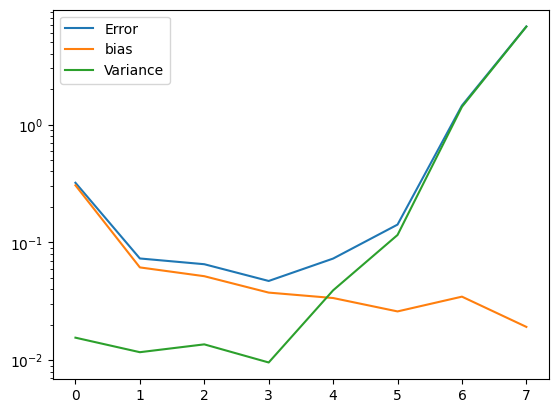

In [ ]:
np.random.seed(2017) 

n = 100
bootstraps = 1000
maxdegree = 8

# make dataset
x = np.linspace(-3, 3, n).reshape(-1, 1) # reshape to scikit learn shape
y = np.exp(-(x**2)) + 1.5 * np.exp(-((x - 2) ** 2)) + np.random.normal(0, 0.1, x.shape)

# initialize
biases = np.zeros(maxdegree)
variances = np.zeros(maxdegree)
mses = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)

# split to test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


for p in range(maxdegree): # loop through the degrees of polynomial
   # initialize predictions, shape [max degree, bootstraps]
   predictions = np.empty((y_test.shape[0], bootstraps))
   #targets = np.empty((y_test.shape[0], bootstraps))

   # Combine x transformation and model 
   model = make_pipeline(PolynomialFeatures(degree=p), LinearRegression(fit_intercept=False))

   for b in range(bootstraps):
       X_train_re, y_train_re = resample(x_train, y_train, n_samples=20) # bootstrap resampling, taking e.g. 20 samples 

       # fit your model on the sampled data
       # make predictions on the test data
       predictions[:,b] = model.fit(X_train_re, y_train_re).predict(x_test).ravel() # Evaluate the new model on the same test data each time.

    
   polydegree[p] = p 
   biases[p] = np.mean( (y_test - np.mean(predictions, axis=1, keepdims=True))**2 )
   variances[p] = np.mean( np.var(predictions, axis=1, keepdims=True) )
   mses[p] = np.mean( np.mean((y_test - predictions)**2, axis=1, keepdims=True))


plt.plot(polydegree, mses, label='Error')
plt.plot(polydegree, biases, label='bias')
plt.plot(polydegree, variances, label='Variance')
plt.yscale("log")
plt.legend()
plt.show()

**e)** Discuss the bias-variance trade-off as function of your model complexity (the degree of the polynomial).

**f)** Compute and discuss the bias and variance as function of the number of data points (choose a suitable polynomial degree to show something interesting).


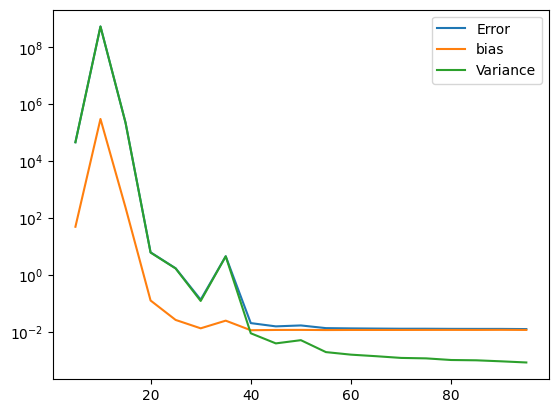

In [114]:
np.random.seed(2017) 

n = 100
bootstraps = 1000
maxdegree = 8

# make dataset
x = np.linspace(-3, 3, n).reshape(-1, 1) # reshape to scikit learn shape
y = np.exp(-(x**2)) + 1.5 * np.exp(-((x - 2) ** 2)) + np.random.normal(0, 0.1, x.shape)

# initialize
n_test = list(range(5,n,5))
biases = np.zeros(len(n_test))
variances = np.zeros(len(n_test))
mses = np.zeros(len(n_test))
polydegree = np.zeros(len(n_test))

# split to test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

for i,p in enumerate(n_test): # loop through the degrees of polynomial
   # initialize predictions, shape [max degree, bootstraps]
   predictions = np.empty((y_test.shape[0], bootstraps))
   #targets = np.empty((y_test.shape[0], bootstraps))

   # Combine x transformation and model 
   model = make_pipeline(PolynomialFeatures(degree=maxdegree), LinearRegression(fit_intercept=False))

   for b in range(bootstraps):
       X_train_re, y_train_re = resample(x_train, y_train, n_samples=p) # bootstrap resampling, taking e.g. 20 samples 

       # fit your model on the sampled data
       # make predictions on the test data
       predictions[:,b] = model.fit(X_train_re, y_train_re).predict(x_test).ravel() # Evaluate the new model on the same test data each time.

    
   polydegree[i] = p 
   biases[i] = np.mean( (y_test - np.mean(predictions, axis=1, keepdims=True))**2 )
   variances[i] = np.mean( np.var(predictions, axis=1, keepdims=True) )
   mses[i] = np.mean( np.mean((y_test - predictions)**2, axis=1, keepdims=True))


plt.plot(polydegree, mses, label='Error')
plt.plot(polydegree, biases, label='bias')
plt.plot(polydegree, variances, label='Variance')
plt.yscale("log")
plt.legend()
plt.show()

## Exercise 5: Interpretation of scaling and metrics


In this course, we often ask you to scale data and compute various metrics. Although these practices are "standard" in the field, we will require you to demonstrate an understanding of _why_ you need to scale data and use these metrics. Both so that you can make better arguements about your results, and so that you will hopefully make fewer mistakes.

First, a few reminders: In this course you should always scale the columns of the feature matrix, and sometimes scale the target data, when it is worth the effort. By scaling, we mean subtracting the mean and dividing by the standard deviation, though there are many other ways to scale data. When scaling either the feature matrix or the target data, the intercept becomes a bit harder to implement and understand, so take care.

Briefly answer the following:

**a)** Why do we scale data?

**b)** Why does the OLS method give practically equivelent models on scaled and unscaled data?

**c)** Why does the Ridge method **not** give practically equivelent models on scaled and unscaled data? Why do we only consider the model on scaled data correct?

**d)** Why do we say that the Ridge method gives a biased model?

**e)** Is the MSE of the OLS method affected by scaling of the feature matrix? Is it affected by scaling of the target data?

**f)** Read about the R2 score, a metric we will ask you to use a lot later in the course. Is the R2 score of the OLS method affected by scaling of the feature matrix? Is it affected by scaling of the target data?

**g)** Give interpretations of the following R2 scores: 0, 0.5, 1.

**h)** What is an advantage of the R2 score over the MSE?


a) Data scaling is important especially if the scale of different variables (e.g. air temperature, wind speed, air pressure) is large. Some methods may not work well with very different scales. 

b) With OLS, the scaling doesn't make a difference, because the parameters would change accordingly when scaling the data. An example from here: https://stats.stackexchange.com/questions/615308/why-feature-scaling-does-not-affect-prediction-output-in-regression: If x was scaled, then beta would just be multiplied by the same amount and the result is the same.

c) Ridge 

d) 

e) 

f)

g)

h)



